# Image Feature Extraction with Object Based Image Analysis (OBIA) 

In [1]:
# imports
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import rasterio as rio
import earthpy.plot as ep

from matplotlib import rcParams
from scipy import stats
from skimage import graph
from skimage.color import label2rgb
from skimage.measure import regionprops, regionprops_table
from skimage.morphology import binary_dilation
from skimage.segmentation import mark_boundaries, slic
from skimage.util import map_array
from tqdm import tqdm


# set general figsize
rcParams['figure.figsize'] = (10,10)

In [2]:
image_path = "./images/Barcelona.tif"
with rio.open(image_path) as src:
    stack = src.read() #BGR red edge NIR
    metadata = src.profile.copy()


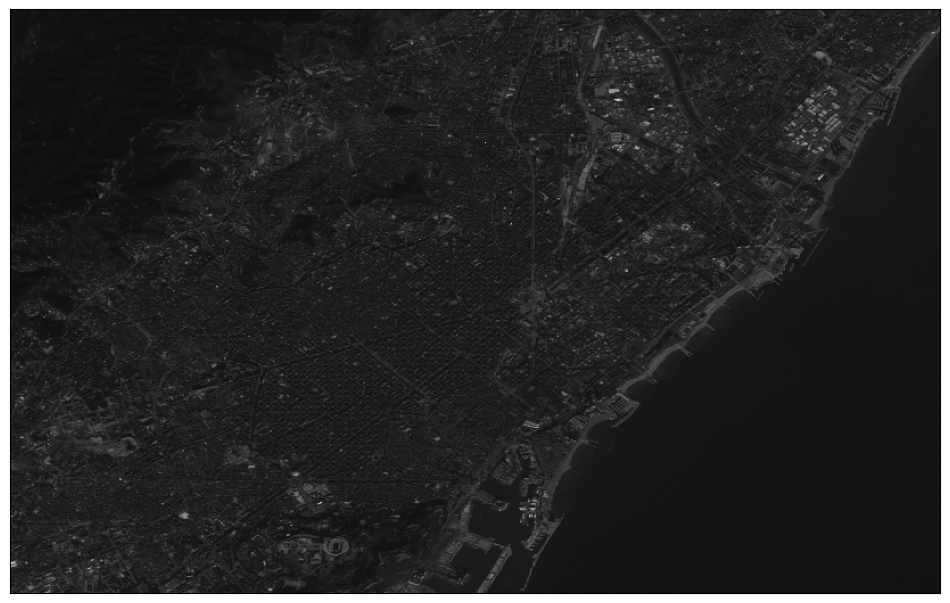

In [5]:
ep.plot_bands(stack[0,:,:], cbar = False)
plt.show()

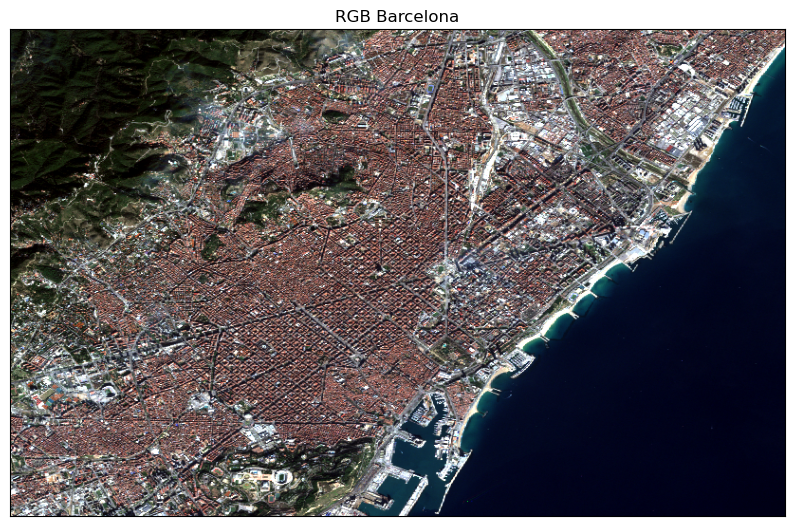

In [10]:
rgb = np.stack([stack[2,:, :], stack[1,:,:], stack[0, :,:]])

ep.plot_rgb(rgb, stretch=True, title = 'RGB Barcelona')
plt.show()

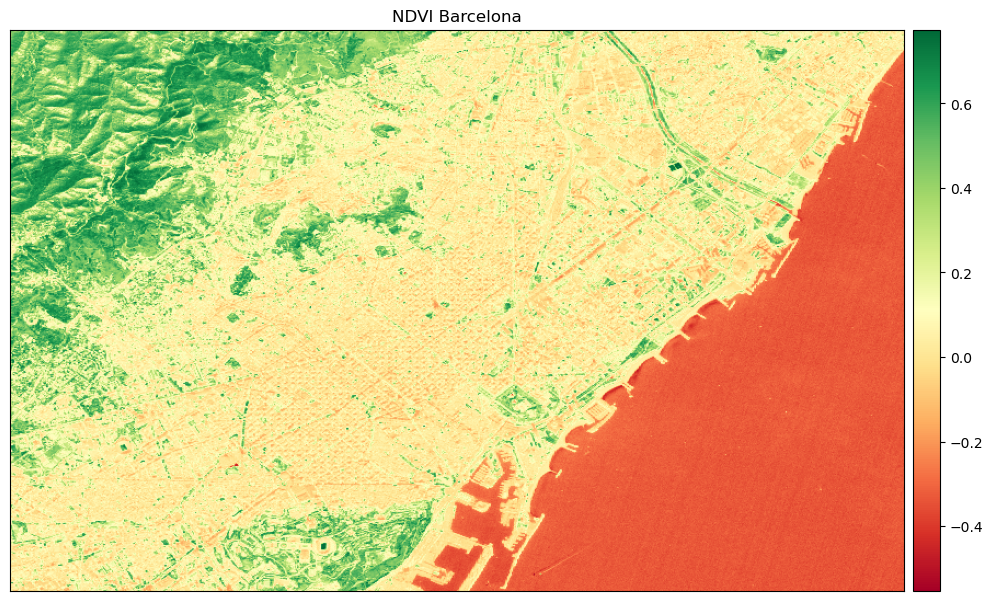

<Axes: title={'center': 'NDVI Barcelona'}>

In [28]:
ndvi = (stack[4,:,:] - stack[2, :,:])/(stack[4,:,:] + stack[2, :,:] + 1e-6)
ndvi = np.expand_dims(ndvi, axis = 0)

ep.plot_bands(ndvi, cmap = 'RdYlGn', title = 'NDVI Barcelona')

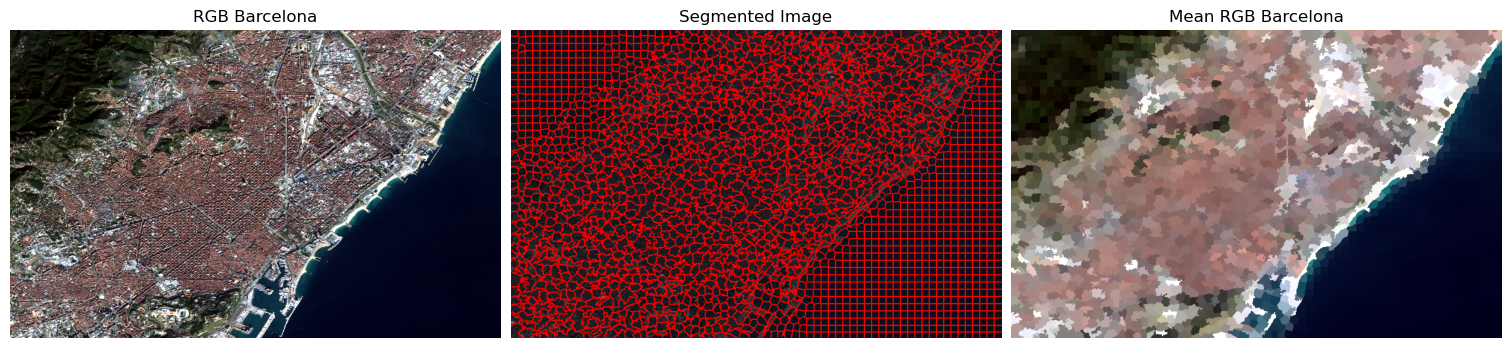

In [21]:
#Swaping dimentions to be used in skimage
rgb_hwb = np.transpose(rgb, axes=[1, 2, 0])


compactness = 4.5
n_segments = 3000

segments = slic(rgb_hwb, n_segments=n_segments, compactness=compactness, start_label=1)

fig, axs = plt.subplots(ncols = 3, figsize = (15,5), constrained_layout = True)

ep.plot_rgb(rgb, stretch=True, title = 'RGB Barcelona', ax = axs[0])


 # Segmentation boundaries plot
axs[1].imshow(
    mark_boundaries(
        rgb_hwb,  # Use the H, W, B formatted image
        segments,
        color=(1, 0, 0)
    )
)
axs[1].set_title("Segmented Image")

# Mean RGB per segment plot
mean_rgb = label2rgb(
        segments,
        rgb_hwb,  # Use the H, W, B formatted image
        kind="avg"
    )
mean_rgb = np.transpose(mean_rgb, axes = [2, 0, 1])

ep.plot_rgb(mean_rgb, stretch=True, title = 'Mean RGB Barcelona', ax = axs[2])


for ax in axs:
    ax.set_axis_off()

plt.show()


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], shape=(513, 817))

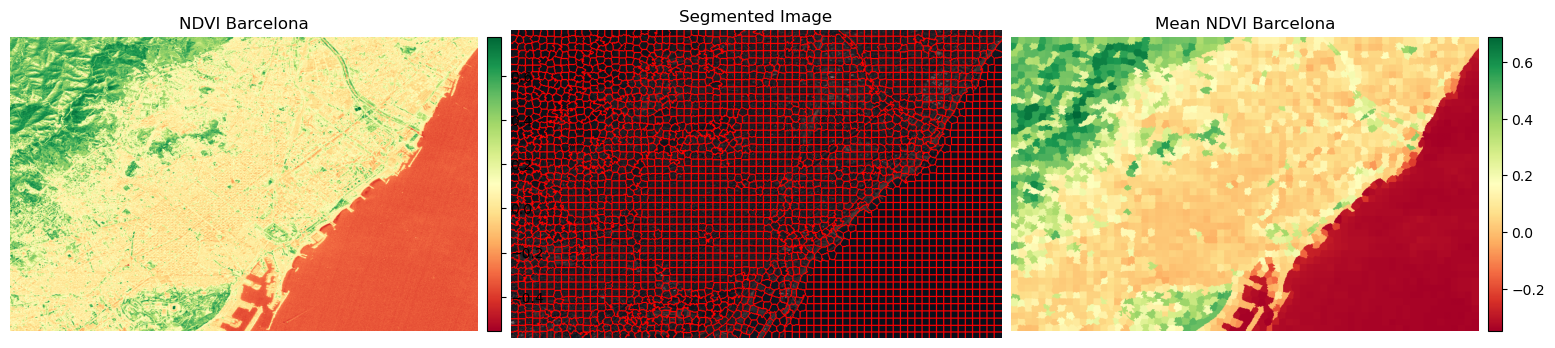

In [46]:
#Swaping dimentions to be used in skimage
ndvi_hwb = np.transpose(ndvi, axes=[1, 2, 0])


compactness = 0.3
n_segments = 3000

segments = slic(ndvi_hwb, n_segments=n_segments, compactness=compactness, start_label=1)

fig, axs = plt.subplots(ncols = 3, figsize = (15,5), constrained_layout = True)

ep.plot_bands(ndvi, cmap = 'RdYlGn', title = 'NDVI Barcelona', ax = axs[0])


 # Segmentation boundaries plot
axs[1].imshow(
    mark_boundaries(
        rgb_hwb,  # Use the H, W, B formatted image
        segments,
        color=(1, 0, 0)
    )
)
axs[1].set_title("Segmented Image")

# Mean RGB per segment plot
mean_ndvi = label2rgb(
        segments,
        ndvi_hwb,  # Use the H, W, B formatted image
        kind="avg"
    )
mean_ndvi = np.transpose(mean_ndvi, axes = [2, 0, 1])

ep.plot_bands(mean_ndvi[0],  cmap = 'RdYlGn',title = 'Mean NDVI Barcelona',ax = axs[2])


for ax in axs:
    ax.set_axis_off()

plt.show()


In [73]:
no_sea = np.where(mean_ndvi[0] > -0.2, mean_ndvi[0], 0)
low_veg_area = no_sea < 0.15

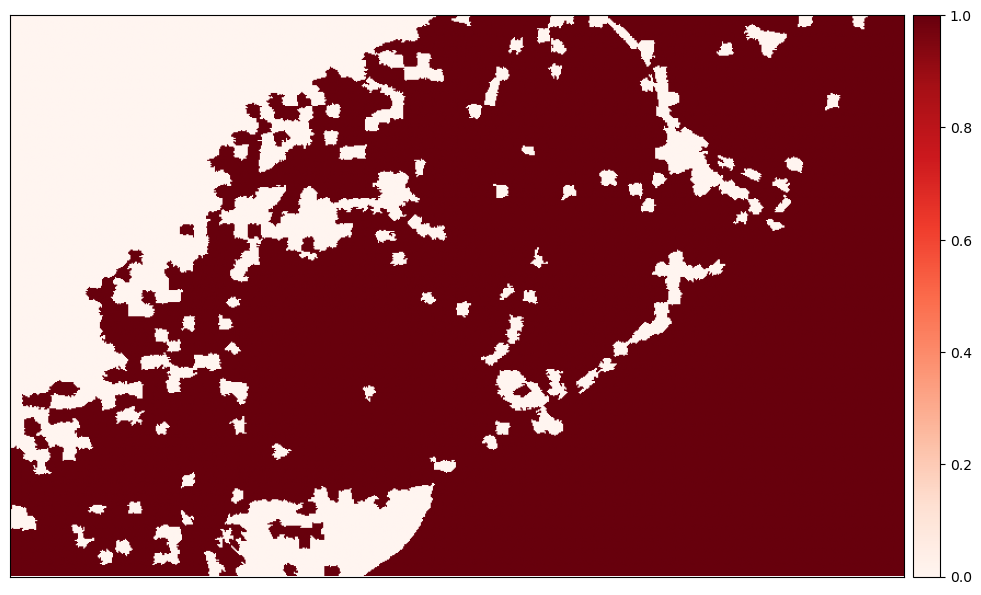

In [74]:
ep.plot_bands(low_veg_area, cmap = 'Reds')
plt.show()